In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()

'/home/luiz/GitHub/data_science'

In [2]:
data = pd.read_csv(r'titanic/train.csv')

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.columns = ['idpassageiro', 'sobreviveu', 'classe', 'nome', 'sexo', 'idade', 'irmaosconjuge',
       'paisfilhos', 'bilhete', 'tarifa', 'cabine', 'embarque']

In [5]:
data.head()

,idpassageiro,sobreviveu,classe,nome,sexo,idade,irmaosconjuge,paisfilhos,bilhete,tarifa,cabine,embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data['sexo'].head()

0      male
1    female
2    female
3    female
4      male
Name: sexo, dtype: object

In [7]:
data['sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)

### Manter apenas o primeiro algarismo da cabine

In [8]:
#for idx, _ in data[['cabine']].dropna().iterrows():
#    data['cabine'].at[idx] = data['cabine'].at[idx][0]
data['cabine'] = data['cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

In [9]:
data['cabine']

0      NaN
1        C
2      NaN
3        C
4      NaN
5      NaN
6        E
7      NaN
8      NaN
9      NaN
10       G
11       C
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21       D
22     NaN
23       A
24     NaN
25     NaN
26     NaN
27       C
28     NaN
29     NaN
      ... 
861    NaN
862      D
863    NaN
864    NaN
865    NaN
866    NaN
867      A
868    NaN
869    NaN
870    NaN
871      D
872      B
873    NaN
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879      C
880    NaN
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: cabine, Length: 891, dtype: object

<h1> Matplotlib

In [10]:
data[['idade']]

,idade
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [11]:
data['idade'].isnull().sum()

177

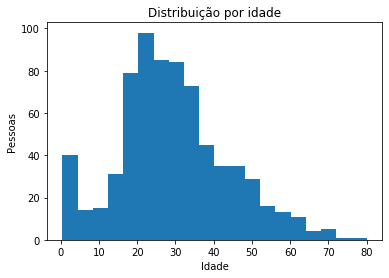

In [12]:
plt.hist(data['idade'].dropna(), bins=20)
plt.title('Distribuição por idade')
plt.xlabel('Idade')
plt.ylabel('Pessoas')
plt.show()

In [13]:
data['classe'].unique()

array([3, 1, 2])

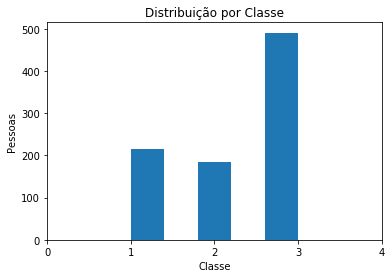

In [14]:
plt.hist(data['classe'], bins=5)
plt.title('Distribuição por Classe')
plt.xlabel('Classe')
plt.ylabel('Pessoas')
plt.xticks(np.arange(5))
plt.show()

### SUBPLOTS FORMA 1

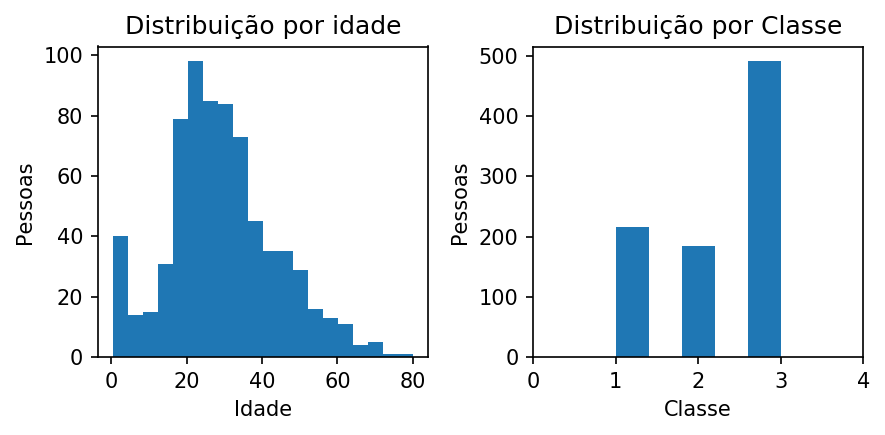

In [15]:
plt.figure(figsize=(6,3), dpi=150)
plt.subplot(1,2,1) # 1 linha 2 colunas plot 1
plt.hist(data['idade'].dropna(), bins=20)
plt.title('Distribuição por idade')
plt.xlabel('Idade')
plt.ylabel('Pessoas')

plt.subplot(1,2,2) # 1 linha 2 colunas plot 1
plt.hist(data['classe'], bins=5)
plt.title('Distribuição por Classe')
plt.xlabel('Classe')
plt.ylabel('Pessoas')
plt.xticks(np.arange(5))

plt.tight_layout()
plt.show()

### SUBPLOTS FORMA 2

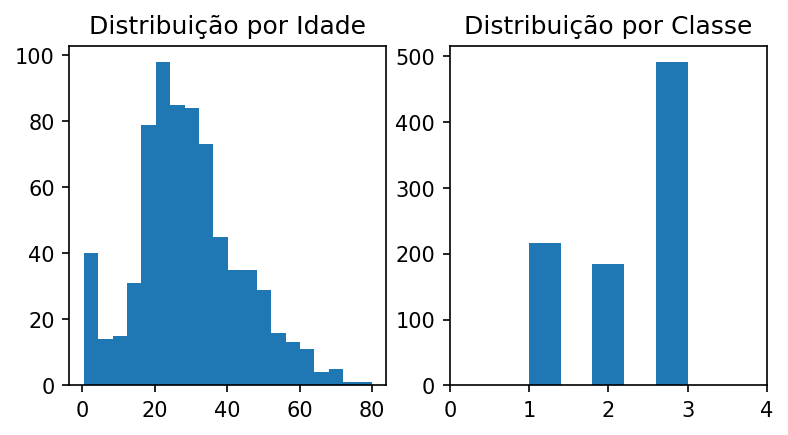

In [16]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi=150) #1 linha 2 colunas
ax[0].hist(data['idade'].dropna(), bins=20)
ax[0].set_title('Distribuição por Idade')


ax[1].hist(data['classe'], bins=5)
ax[1].set_title('Distribuição por Classe')
ax[1].set_xticks(np.arange(5))

plt.show()

### Seaborn

In [17]:
import seaborn as sns

In [18]:
data['sobreviveu'].value_counts()

0    549
1    342
Name: sobreviveu, dtype: int64

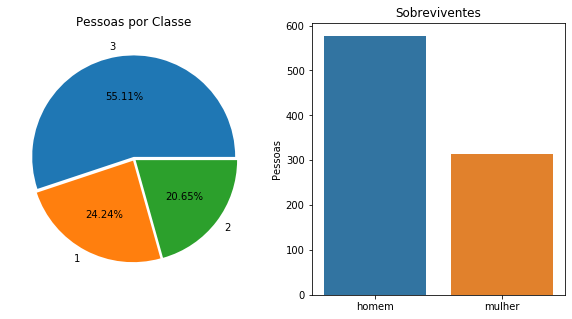

In [19]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['classe'].value_counts().plot.pie(ax=ax[0], explode=(0.02,0.02,0.02), autopct='%0.2f%%')
ax[0].set_ylabel('')
ax[0].set_title('Pessoas por Classe')


sns.countplot('sexo', data=data, ax=ax[1])
sns.set(style="darkgrid")
ax[1].set_ylabel('Pessoas')
ax[1].set_xlabel('')
ax[1].set_title('Sobreviventes')

plt.show()

### Countplot + Hue

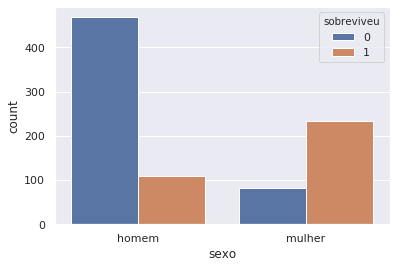

In [20]:
sns.countplot('sexo', hue='sobreviveu', data=data)
plt.show()

### Boxplot

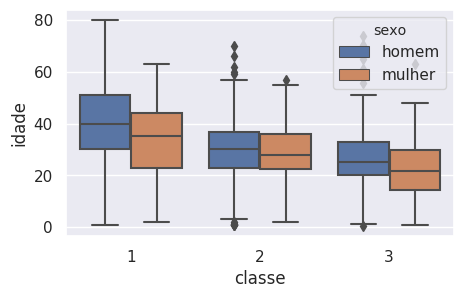

In [21]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='classe', y='idade', hue='sexo', data=data)

plt.show()

### Violinplot

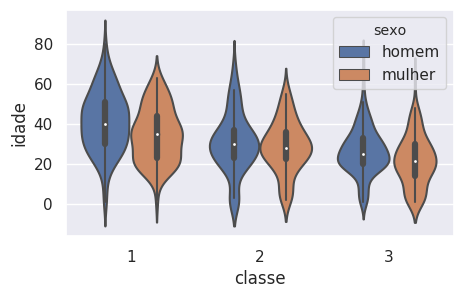

In [22]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='classe', y='idade', hue='sexo', data=data)

plt.show()

### FacetGrid c/ Histogramas

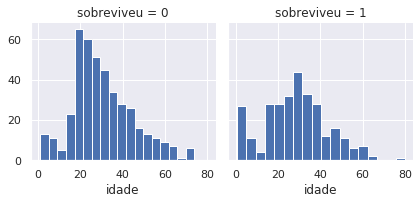

In [23]:
g = sns.FacetGrid(data, col='sobreviveu')
g.map(plt.hist, 'idade', bins=18)

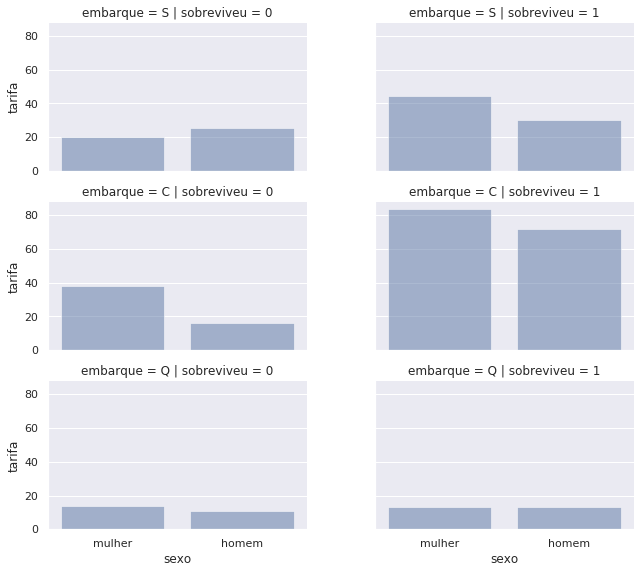

In [32]:
g = sns.FacetGrid(data, row='embarque', col='sobreviveu')
g.map(sns.barplot, 'sexo', 'tarifa', alpha=0.5, ci=None)

fig=plt.gcf()
fig.set_size_inches(10,8)

### FacetGrid c/ Distplot (Histograma +  função densidade de probabilidade)

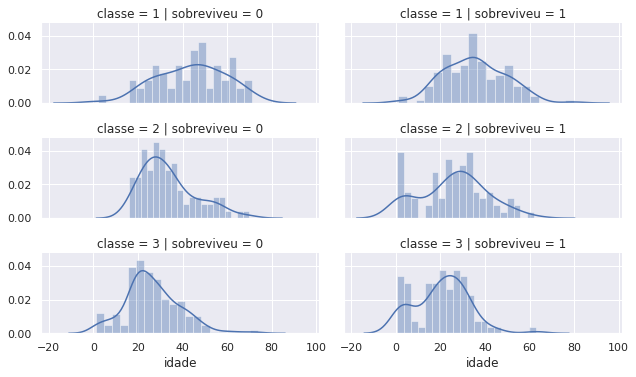

In [25]:
g = sns.FacetGrid(data, row='classe', col='sobreviveu', height=1.8, aspect=2.5)
g.map(sns.distplot, 'idade', bins=20)

### Catplot do tipo point

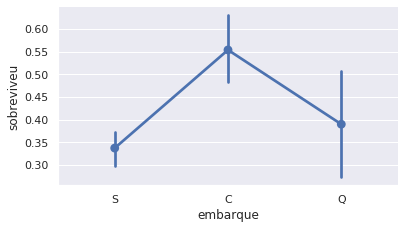

In [26]:
sns.catplot('embarque', 'sobreviveu', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

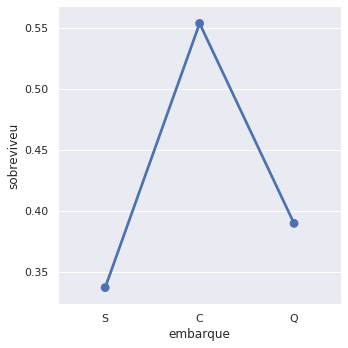

In [27]:
sns.catplot('embarque', 'sobreviveu', data=data, kind='point', ci=None)

In [28]:
data['embarque'].value_counts()

S    644
C    168
Q     77
Name: embarque, dtype: int64

### FacetGrid c/ pointplot

/usr/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/lib/python3.6/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


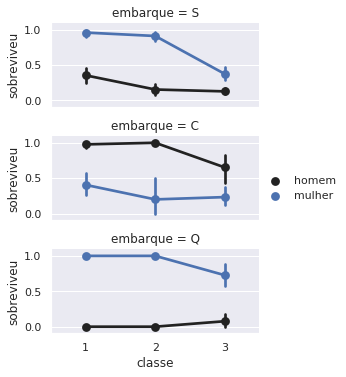

In [33]:
g = sns.FacetGrid(data, row='embarque', height=1.8, aspect=2.2)
g.map(sns.pointplot, 'classe', 'sobreviveu', 'sexo')
g.add_legend()

### HeatMap

In [34]:
data.isnull().sum()

idpassageiro       0
sobreviveu         0
classe             0
nome               0
sexo               0
idade            177
irmaosconjuge      0
paisfilhos         0
bilhete            0
tarifa             0
cabine           687
embarque           2
dtype: int64

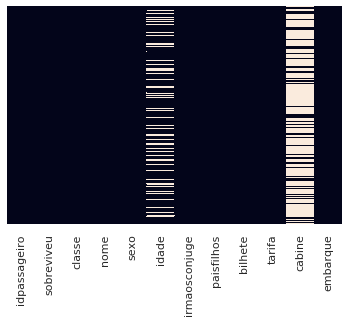

In [40]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

### Relplot

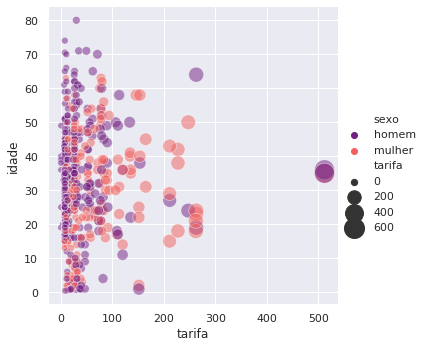

In [49]:
sns.relplot(x='tarifa', y='idade', hue='sexo', size='tarifa', data=data, sizes=(40,400), alpha=0.5, palette='magma')
plt.show()